<a href="https://colab.research.google.com/github/pkarthikeyan98/ProjectA-github-wokrshop-/blob/main/UOWT04T05_Tutorial_1_image_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CSCI323 Tutoroial Group 4&5

##Tutorial 1 Class exercise

Get to know PyTorch and CNN

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from matplotlib.pyplot import imshow

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

#Proceed according to this flow.

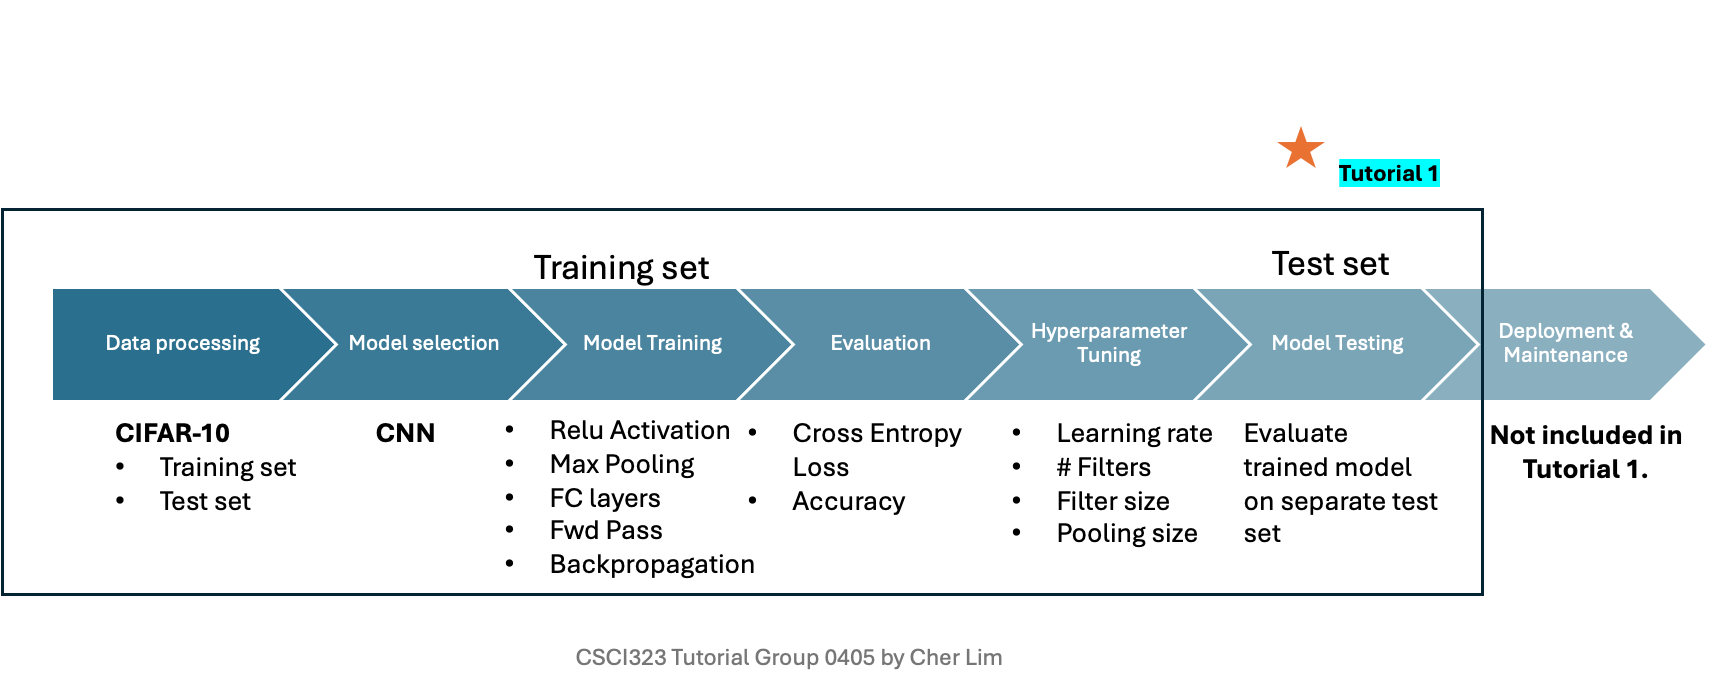

In [ ]:
# 1. Load and normalize CIFAR10

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#unlabelled data cause it's image

batch_size = 4 # 4 sample, at any one time only process 4 images

trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform) # training of model

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=2)

# shuffle is true as we dont want the model to remember the pattern / sequence

#default split 70, 30

testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transform)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=batch_size,
                                         shuffle=False,
                                         num_workers=2)

# shuffle false, so that you can go back and refer and debug

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


# Warmup exercise: Understanding image preparation for deep learning

You have just downloaded the image data CIFAR10 from the library into training dataset (trainset) and testing dataset (testset).

Let's dive in to understand what have been done:
1. Do you know the reasons for setting shuffle=True for trainset while shuffle=False for testset?
2. How do you explain the normalization formula in transform.Normalise?
3. Can you now explain the unnormalization formula below in imshow() function?

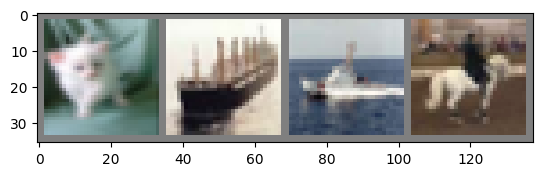

cat   ship  ship  horse


In [ ]:
#Not necessary for CNN
# this is just to see what is inside
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()  #Convert image to numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

#2. Take a moment to understand the followings:
1. What is a class structure?
2. Can you relate the information in Net to the diagram of the CNN layers provided below?

In [ ]:
# 2. Define a Convolutional Neural Network
class Net(nn.Module):
  #inherit the architecture of the nueral network
    def __init__(self):
        super().__init__()
        # these are all defination
        self.conv1 = nn.Conv2d(3, 6, 5) # this is talking about the convulation layer 1 3 --> 3 layer (32x32x(3)) , 6 --> kernel, 5 --> filter size
        self.pool = nn.MaxPool2d(2, 2) # this is for down sampler
        self.conv2 = nn.Conv2d(6, 16, 5) # if we want to 3,3 we need to have another pool
        self.fc1 = nn.Linear(16 * 5 * 5, 120) #flatten 1
        self.fc2 = nn.Linear(120, 84) #flatten 2
        self.fc3 = nn.Linear(84, 10) #flatten 3

#relu gives randomness, so it can converge better

    def forward(self, x): #forward pass
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


#CNN layer definition

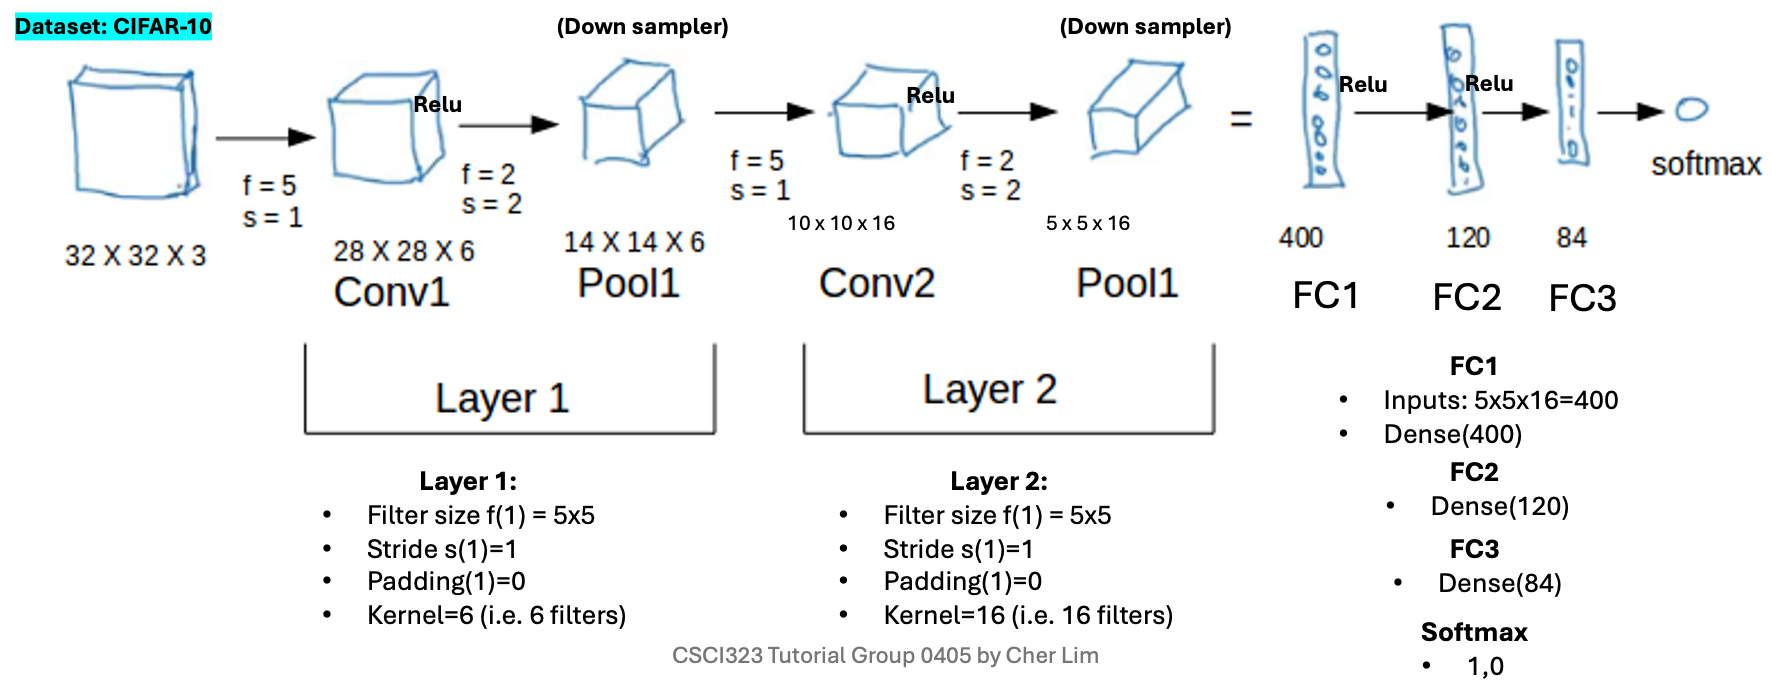

#3. Forward pass and Back propagation of a typical neural network
Can you identify where is this being implemented in the code below?


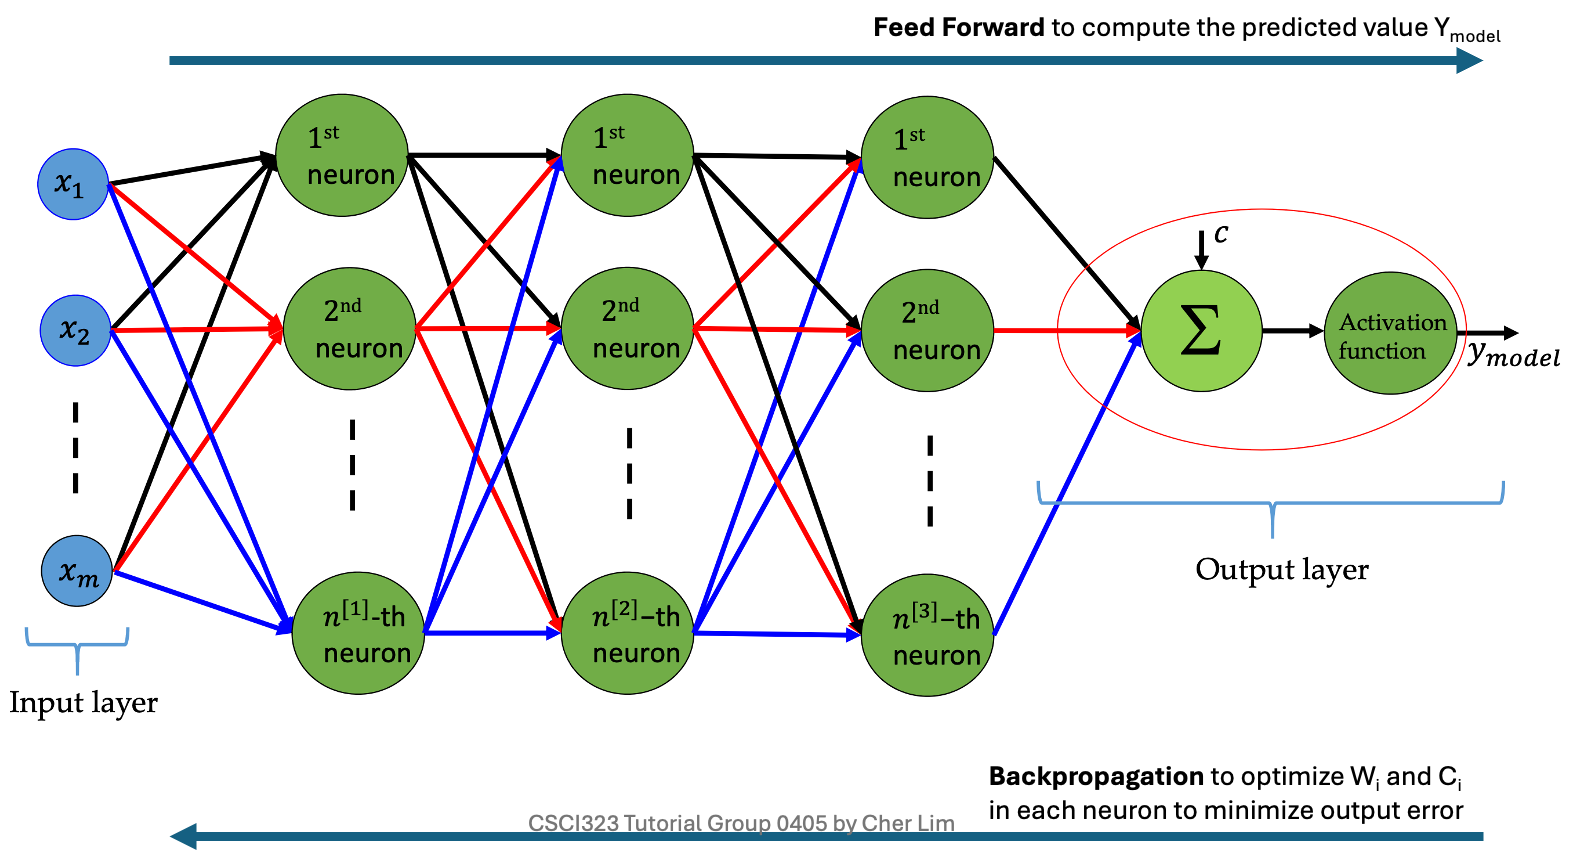

In [ ]:
# 3. Train the network
def train_network():
    # 3. Define a Loss function and optimizer
    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    for epoch in range(2):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels) # partial differentiation , i think so
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

    print('Finished Training')

    PATH = './cifar_net.pth'
    torch.save(net.state_dict(), PATH) # W and C are saved in this file


In [ ]:
# 4. Test the network: predict the class for four test data
def test_network_predict(): # pumping in the test data into the train model

    dataiter = iter(testloader)
    images, labels = next(dataiter)
    #
    # # print images
    # imshow(torchvision.utils.make_grid(images))
    # print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
    net = Net()
    PATH = './cifar_net.pth'
    net.load_state_dict(torch.load(PATH))

    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                                  for j in range(4)))

#4. Where can you find the trained model?

In [ ]:
# 4. Test the network: get the accuracy of the test data
def test_network_accuracy():
    net = Net()
    PATH = './cifar_net.pth'
    net.load_state_dict(torch.load(PATH))

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


In [ ]:
# 4. Test the network: count predictions for each class
def test_network_accuracy_each_class():
    net = Net()
    PATH = './cifar_net.pth'
    net.load_state_dict(torch.load(PATH))

    # prepare to count predictions for each class
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    # again no gradients needed
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

if __name__ == '__main__':
    train_network()

    # there are three ways to test the network in the following three functions: uncomment one based on your preference

    # 4. Test the network: predict the class for four test data
    # test_network_predict()
    #
    # 4. Test the network: get the accuracy of the network
    # test_network_accuracy()
    #
    # 4. Test the network: count predictions for each class
    test_network_accuracy_each_class()

[1,  2000] loss: 2.181
[1,  4000] loss: 1.888
[1,  6000] loss: 1.712
[1,  8000] loss: 1.600
[1, 10000] loss: 1.532
[1, 12000] loss: 1.485
[2,  2000] loss: 1.413
[2,  4000] loss: 1.363
[2,  6000] loss: 1.340
[2,  8000] loss: 1.333
[2, 10000] loss: 1.297
[2, 12000] loss: 1.285
Finished Training
Accuracy for class: plane is 65.2 %
Accuracy for class: car   is 54.7 %
Accuracy for class: bird  is 40.6 %
Accuracy for class: cat   is 36.6 %
Accuracy for class: deer  is 41.7 %
Accuracy for class: dog   is 41.7 %
Accuracy for class: frog  is 49.4 %
Accuracy for class: horse is 80.3 %
Accuracy for class: ship  is 50.5 %
Accuracy for class: truck is 79.5 %


#Take a moment to understand the results.

Would you want to experiment with different parameters? (Check out the Hyperparameter tuning below)

Rerun the program with different values and observe any changes in the results.

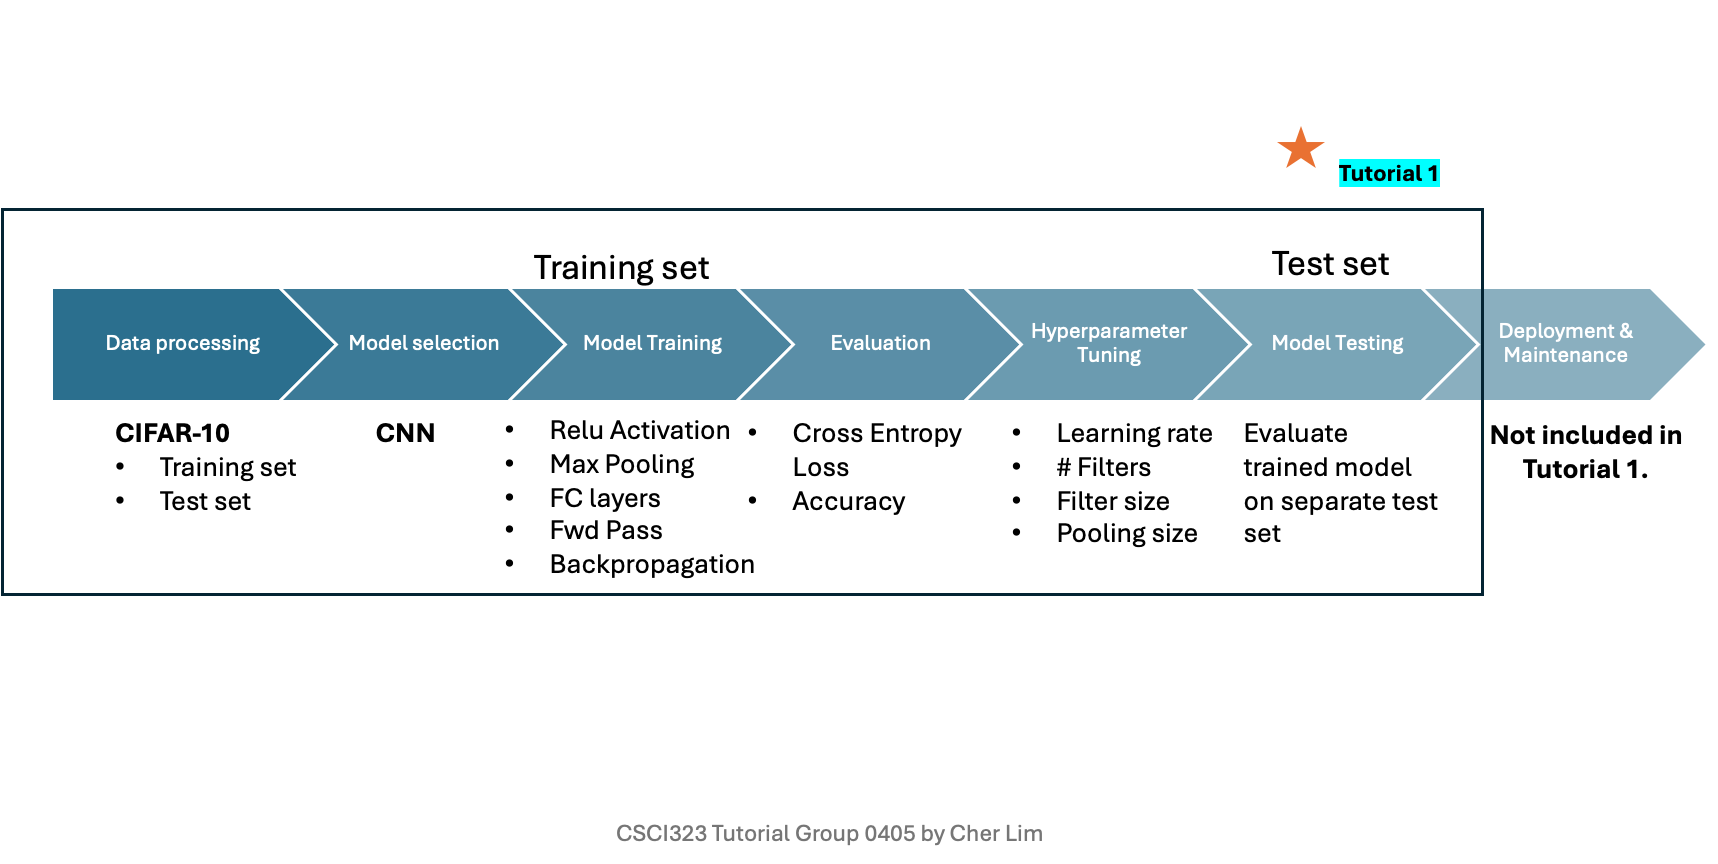